# Análisis de Dataset: Anuncios de Autos Usados en Bielorrusia
## 1. Descripción general del dataset
Este conjunto de datos corresponde a anuncios de autos usados recolectados de distintas fuentes web en Bielorrusia el **2 de diciembre de 2019**.

**Objetivo principal**: Analizar el mercado de autos usados y construir un modelo predictivo del precio del vehículo, considerando tanto variables numéricas como categóricas.

El dataset contiene información relacionada con:
- Características técnicas del vehículo
- Estado y antigüedad
- Ubicación y detalles del anuncio
- Equipamiento adicional
---

## 2. Variable objetivo (target)

**`price_usd`**

- **Tipo**: Numérica continua
- **Descripción**: Precio del automóvil expresado en dólares estadounidenses (USD)
- **Objetivo del modelo**: Predecir el precio del vehículo a partir de sus características físicas, técnicas y comerciales mediante un modelo de regresión lineal
---

## 3. Descripción de las variables principales

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



df= pd.read_csv('data/cars.csv')

In [330]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

### Variables numéricas
- `odometer_value`: Kilometraje del vehículo
- `year_produced`: Año de fabricación
- `engine_capacity`: Capacidad del motor en litros
- `number_of_photos`: Número de fotos en el anuncio
- `up_counter`: Cantidad de veces que el anuncio fue promovido
- `duration_listed`: Días que el anuncio ha estado publicado

### Variables categóricas
- `manufacturer_name`: Marca del vehículo
- `model_name`: Modelo del vehículo
- `transmission`: Tipo de transmisión (automática, mecánica)
- `color`: Color del automóvil
- `engine_fuel`: Tipo de combustible
- `engine_type`: Tipo de motor
- `body_type`: Tipo de carrocería
- `drivetrain`: Tipo de tracción
- `location_region`: Región donde se publica el vehículo
- `state`: Condición del vehículo

### Variables binarias (booleanas)
- `engine_has_gas`: Indica si el vehículo usa gas
- `has_warranty`: Indica si cuenta con garantía
- `is_exchangeable`: Indica si se acepta intercambio
- `feature_0` a `feature_9`: Presencia de características adicionales del vehículo (equipamiento)
---

## 4. Valores nulos (NA)

In [332]:
columnas = ['manufacturer_name', 'model_name', 'transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable', 'location_region', 'number_of_photos', 'up_counter', 'duration_listed']
for col in columnas:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())
    print(f"Número de valores únicos: {df[col].nunique()}") 


Valores únicos en 'manufacturer_name':
['Subaru' 'LADA' 'Dodge' 'УАЗ' 'Kia' 'Opel' 'Москвич' 'Alfa Romeo' 'Acura'
 'Dacia' 'Lexus' 'Mitsubishi' 'Lancia' 'Citroen' 'Mini' 'Jaguar' 'Porsche'
 'SsangYong' 'Daewoo' 'Geely' 'ВАЗ' 'Fiat' 'Ford' 'Renault' 'Seat' 'Rover'
 'Volkswagen' 'Lifan' 'Jeep' 'Cadillac' 'Audi' 'ЗАЗ' 'Toyota' 'ГАЗ'
 'Volvo' 'Chevrolet' 'Great Wall' 'Buick' 'Pontiac' 'Lincoln' 'Hyundai'
 'Nissan' 'Suzuki' 'BMW' 'Mazda' 'Land Rover' 'Iveco' 'Skoda' 'Saab'
 'Infiniti' 'Chery' 'Honda' 'Mercedes-Benz' 'Peugeot' 'Chrysler']
Número de valores únicos: 55

Valores únicos en 'model_name':
['Outback' 'Forester' 'Impreza' ... '180' 'Vision' 'Aspen']
Número de valores únicos: 1118

Valores únicos en 'transmission':
['automatic' 'mechanical']
Número de valores únicos: 2

Valores únicos en 'color':
['silver' 'blue' 'red' 'black' 'grey' 'other' 'brown' 'white' 'green'
 'violet' 'orange' 'yellow']
Número de valores únicos: 12

Valores únicos en 'odometer_value':
[190000 290000 402000 ..



Tras el análisis inicial de valores faltantes se observa que:

- La única variable con valores nulos es `engine_capacity`, con **10 valores faltantes**
- El resto de las variables no presentan valores nulos

### Tratamiento de valores nulos
Para este estudio:
- Se eliminarán las filas con valores nulos en `engine_capacity`, ya que representan una fracción muy pequeña del dataset y esta variable es relevante para la predicción del precio

```python
df = df.dropna()

In [333]:
conteo_nan = df['engine_capacity'].isna().sum()
print(f"Número de NaN: {conteo_nan}")  # Output: 2

Número de NaN: 10


In [334]:
df_clear = df.dropna(subset=['engine_capacity'])
print(df_clear['engine_capacity'].unique())

[2.5   3.    2.    3.6   1.3   2.2   1.6   1.5   1.2   1.    1.8   1.7
 1.1   1.4   2.4   3.3   2.7   3.5   3.2   3.8   5.2   5.7   3.9   5.9
 3.7   4.7   4.2   2.8   2.9   2.3   1.9   3.1   2.6   2.1   0.9   4.6
 5.    4.3   4.    0.2   4.8   4.5   0.8   5.8   5.4   6.    4.9   7.5
 6.4   6.8   4.1   6.2   3.4   4.4   8.    5.3   5.6   5.5   5.461 6.3
 0.5  ]


---

## 5. Variables a eliminar

Con el fin de construir un modelo de regresión lineal más simple e interpretable, se eliminarán las siguientes variables:

| Variable             | Razón de eliminación                                                  |
|----------------------|-----------------------------------------------------------------------|
| `model_name`         | Alta cardinalidad, puede introducir ruido                             |
| `feature_0` a `feature_9` | Variables binarias poco interpretables individualmente           |
| `up_counter`         | Variable relacionada al comportamiento del anuncio, no al vehículo    |
| `number_of_photos`   | Influye en visibilidad del anuncio, no en el valor real del auto      |
| `duration_listed`    | Variable dependiente del mercado, no del vehículo                     |

<br>

> **Nota**: Estas variables no aportan información directa al valor intrínseco del automóvil o dificultan la interpretación del modelo lineal.

In [335]:
df_clear = df.drop(columns=['model_name','feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'up_counter', 'number_of_photos', 'duration_listed','location_region'])
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   transmission       38531 non-null  object 
 2   color              38531 non-null  object 
 3   odometer_value     38531 non-null  int64  
 4   year_produced      38531 non-null  int64  
 5   engine_fuel        38531 non-null  object 
 6   engine_has_gas     38531 non-null  bool   
 7   engine_type        38531 non-null  object 
 8   engine_capacity    38521 non-null  float64
 9   body_type          38531 non-null  object 
 10  has_warranty       38531 non-null  bool   
 11  state              38531 non-null  object 
 12  drivetrain         38531 non-null  object 
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  bool   
dtypes: bool(3), float64(2), int64(2), object(8)
memory usage: 3.6+ MB


In [336]:
variables_categoricas = ['manufacturer_name', 'transmission', 'color', 'engine_fuel','engine_type','body_type', 'state', 'drivetrain', 'is_exchangeable']
variables_numericas = ['odometer_value', 'year_produced', 'engine_capacity', 'price_usd']



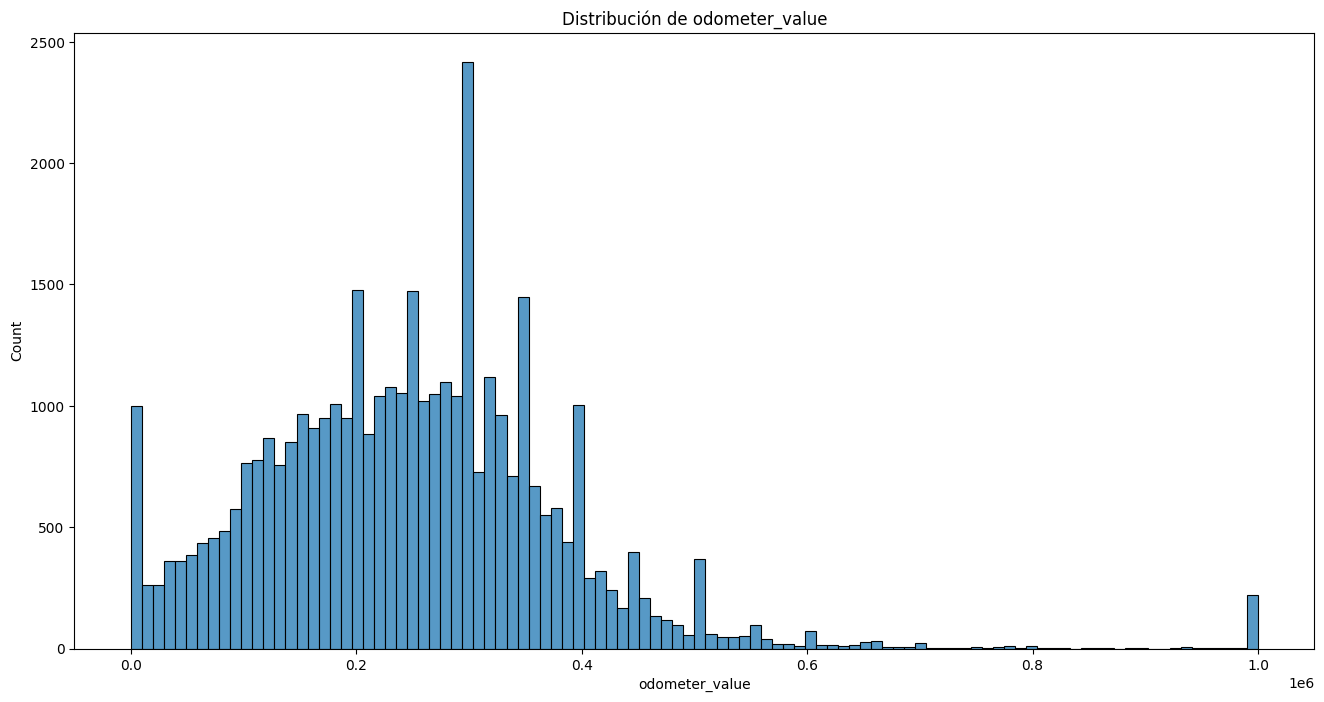

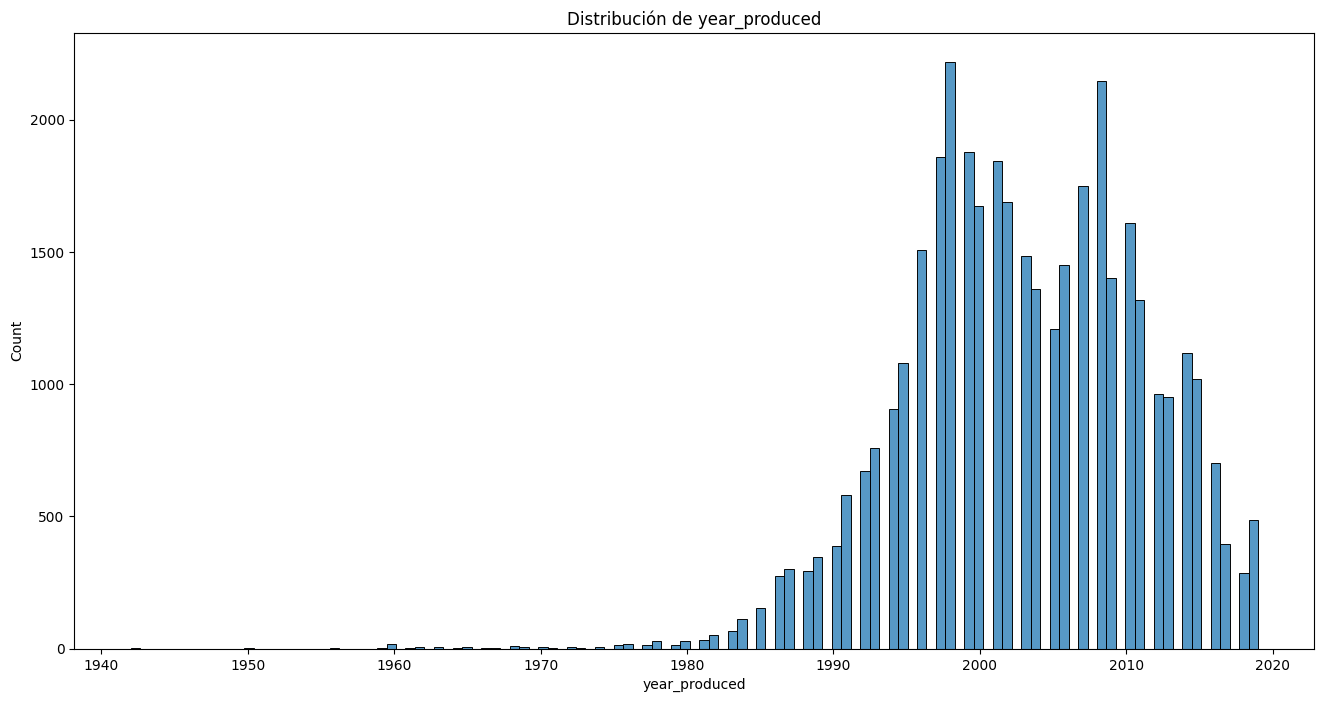

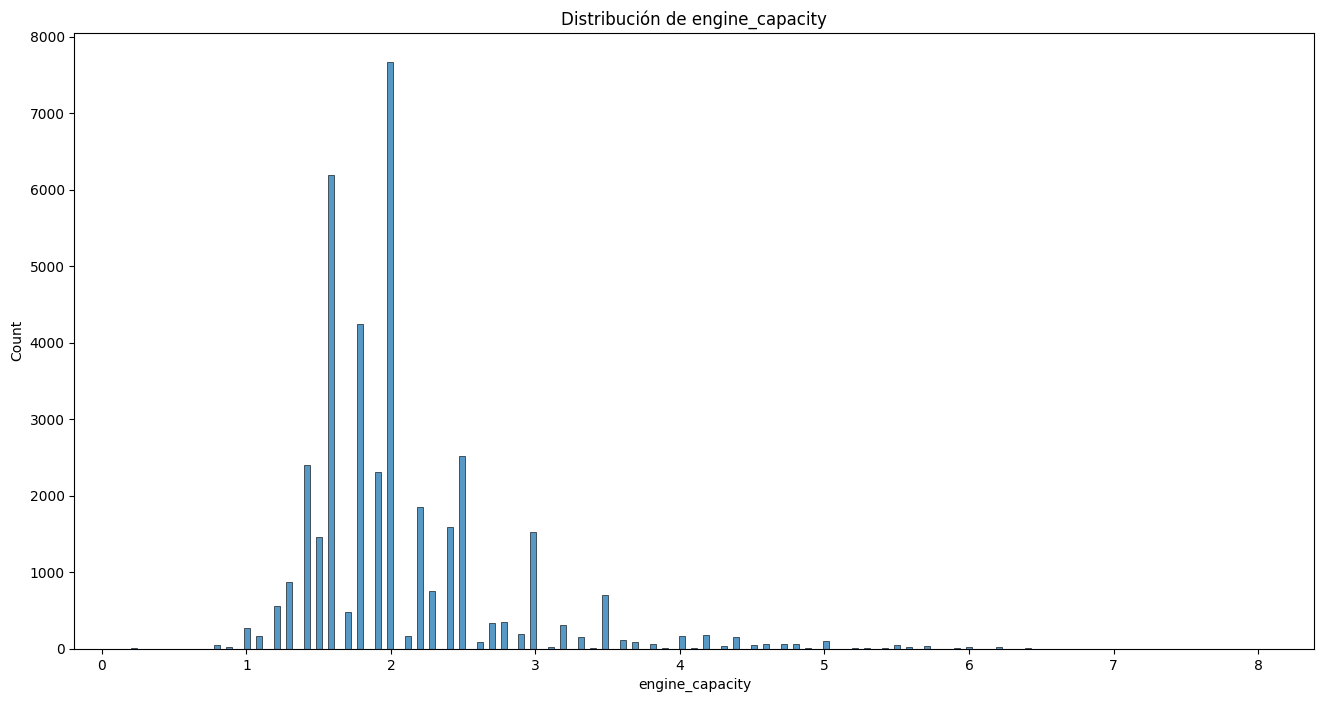

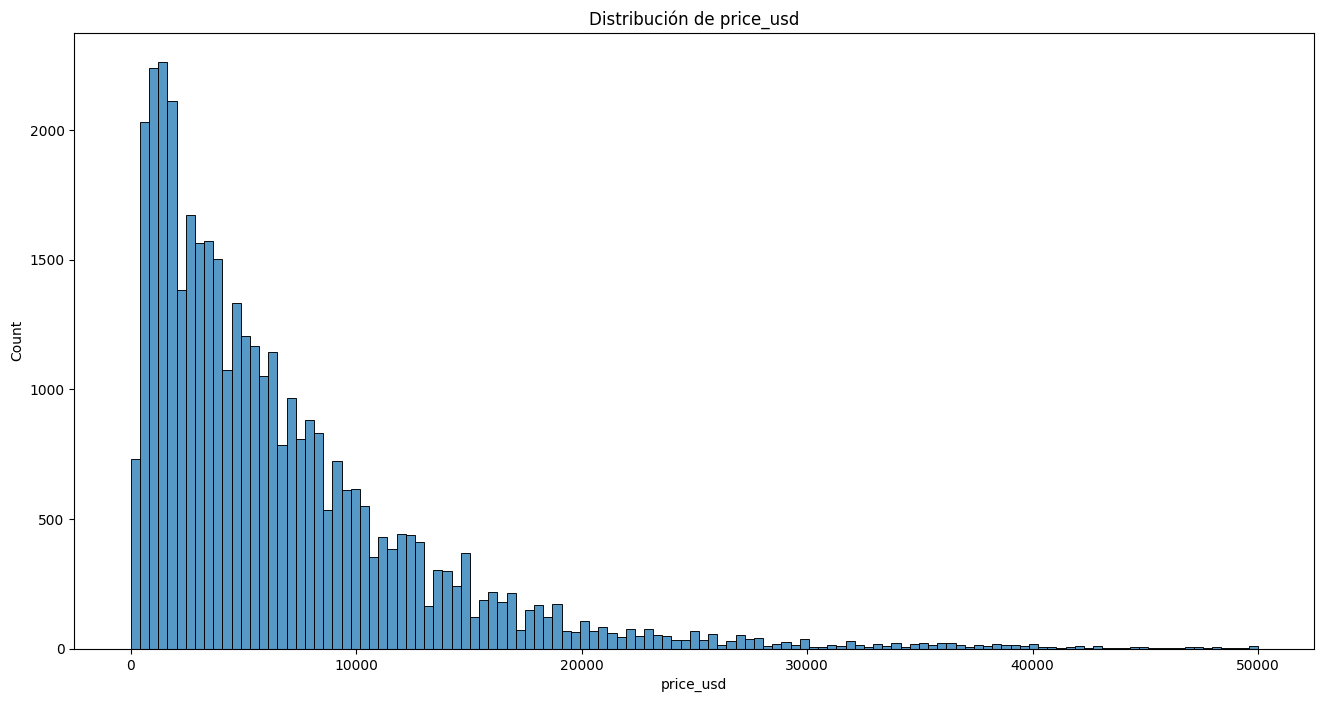

In [337]:
for col in variables_numericas:
    plt.figure(figsize=(16,8))
    sns.histplot(df_clear[col], kde=False)
    plt.title(f'Distribución de {col}')
    plt.show()


A partir del análisis exploratorio, se identificaron valores de precio cercanos a cero que representan una proporción mínima del conjunto de datos y no reflejan precios reales del mercado automotriz. Dichos valores fueron considerados atípicos y eliminados para mejorar la estabilidad y capacidad predictiva del modelo de regresión lineal.

1.0
(38531, 30)


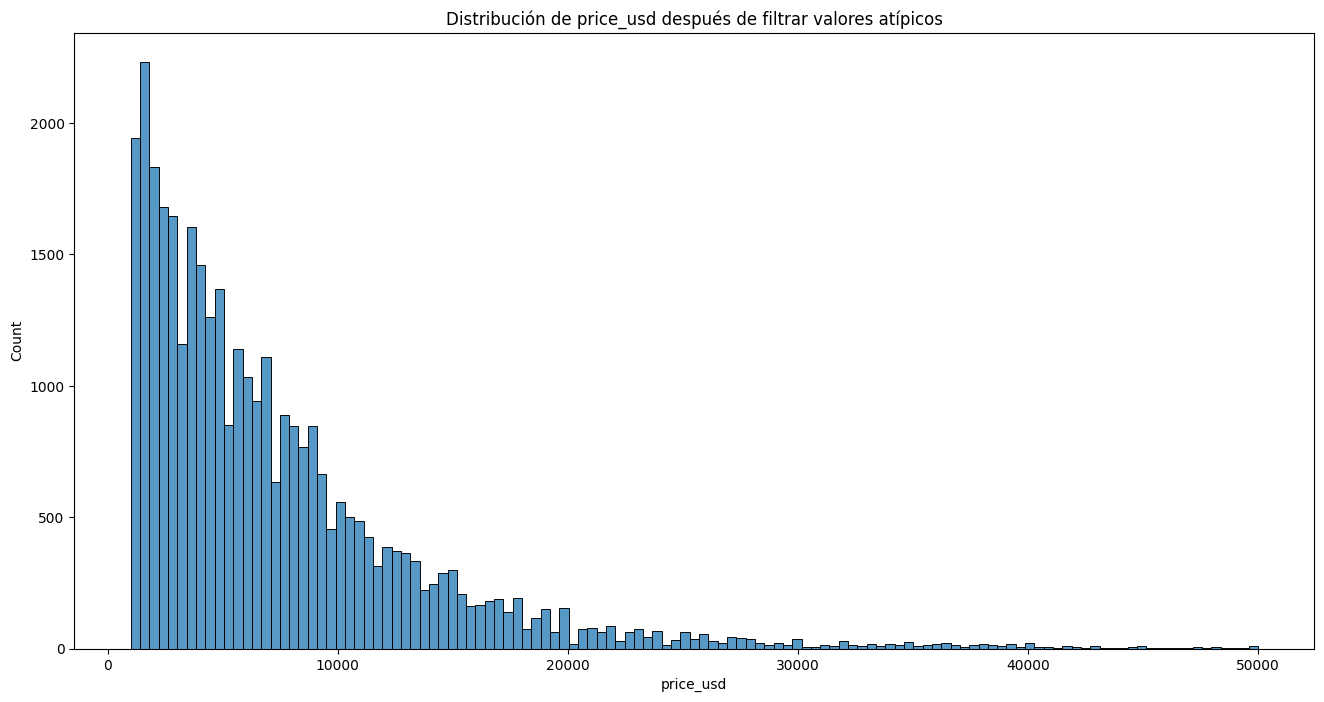

In [338]:
df_clear = df_clear[df_clear["price_usd"] > 1000]
print(df["price_usd"].min())
print(df.shape)
plt.figure(figsize=(16,8))
sns.histplot(df_clear["price_usd"], kde=False)
plt.title('Distribución de price_usd después de filtrar valores atípicos')
plt.show()

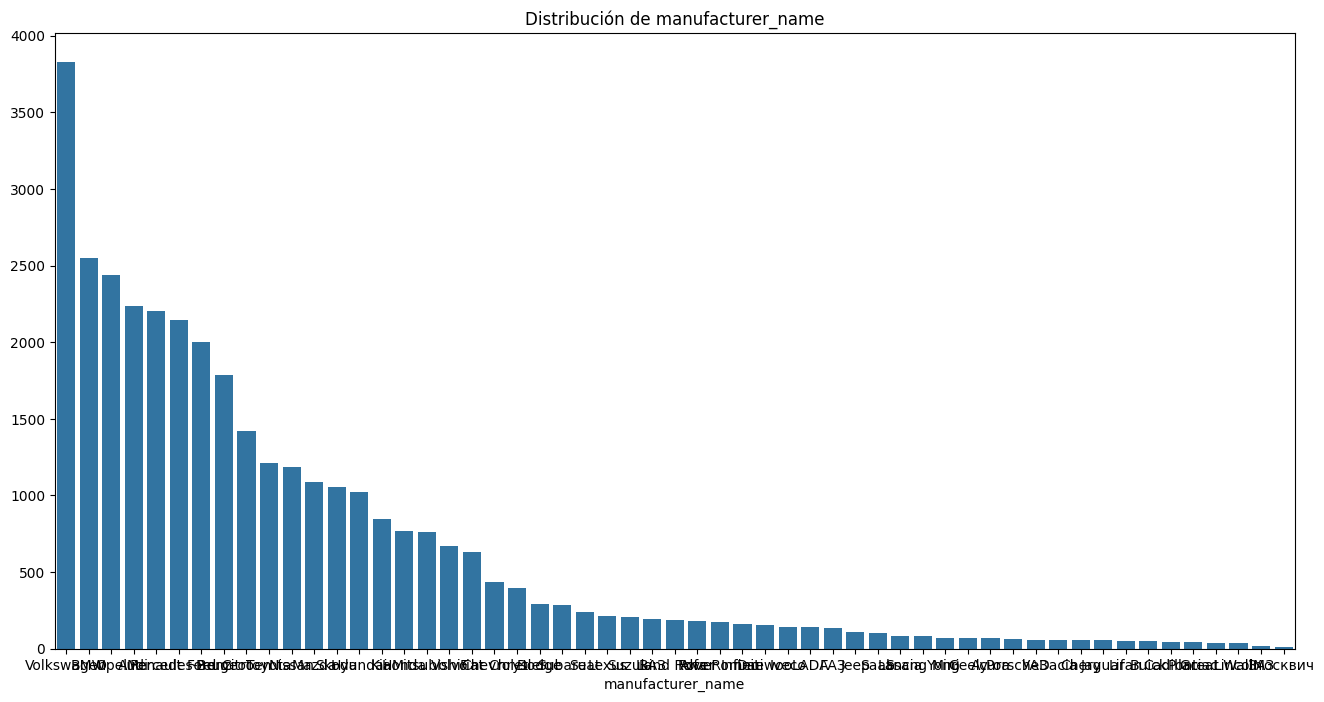

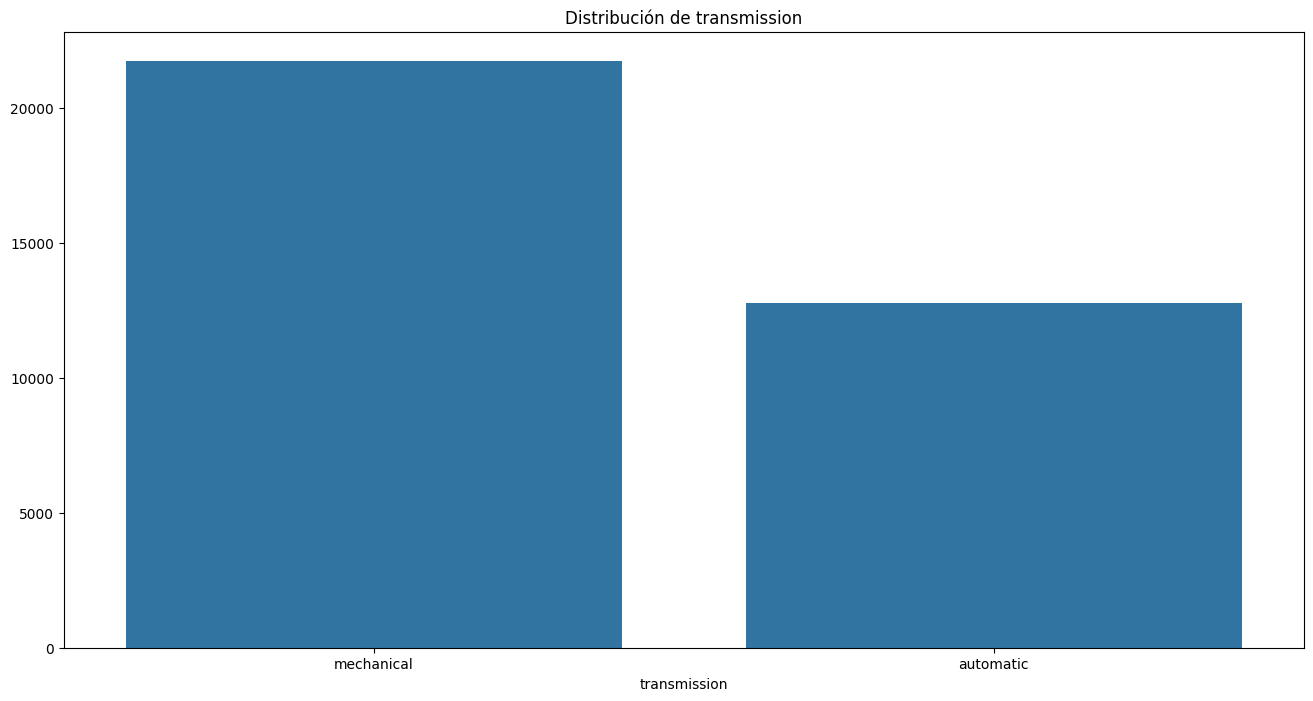

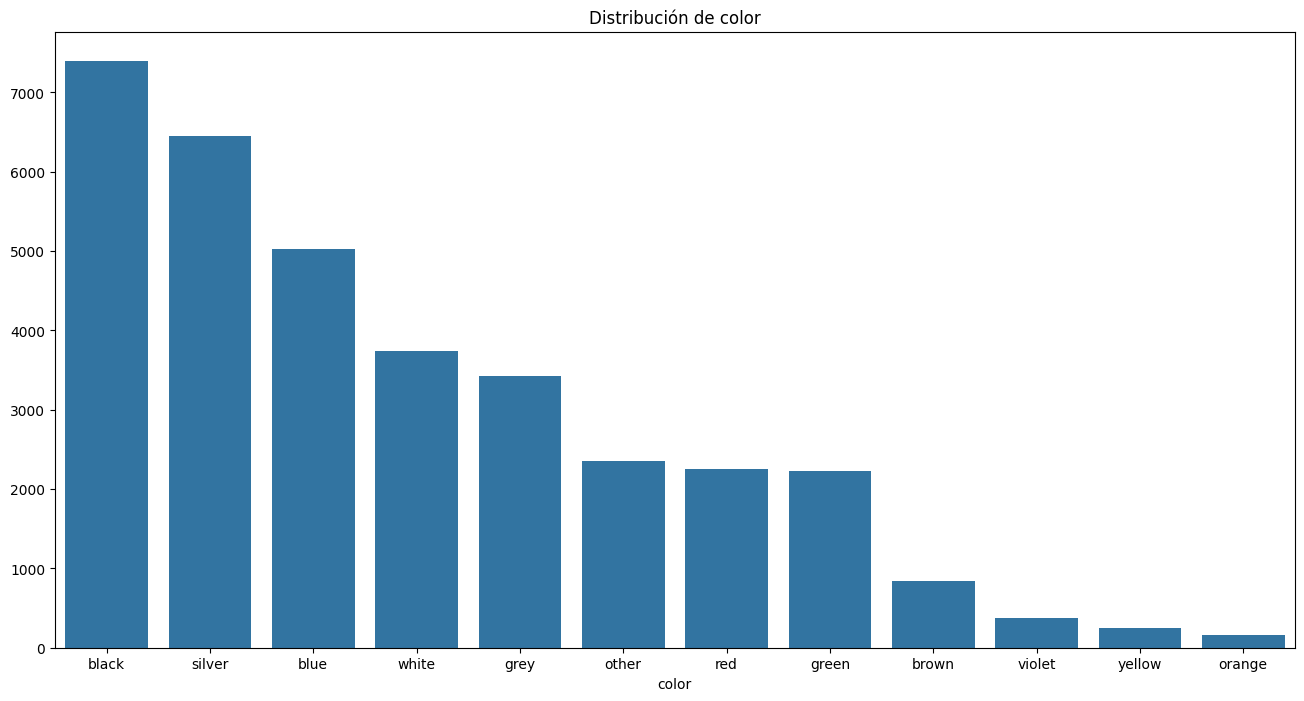

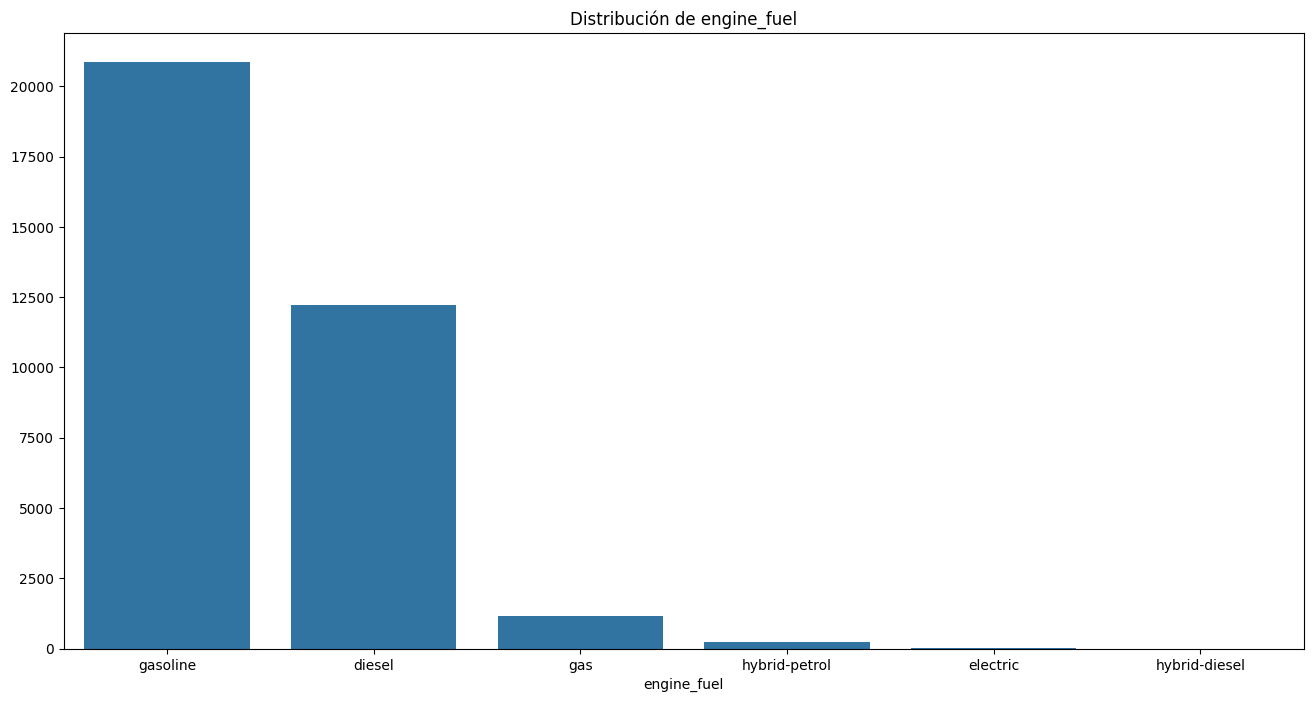

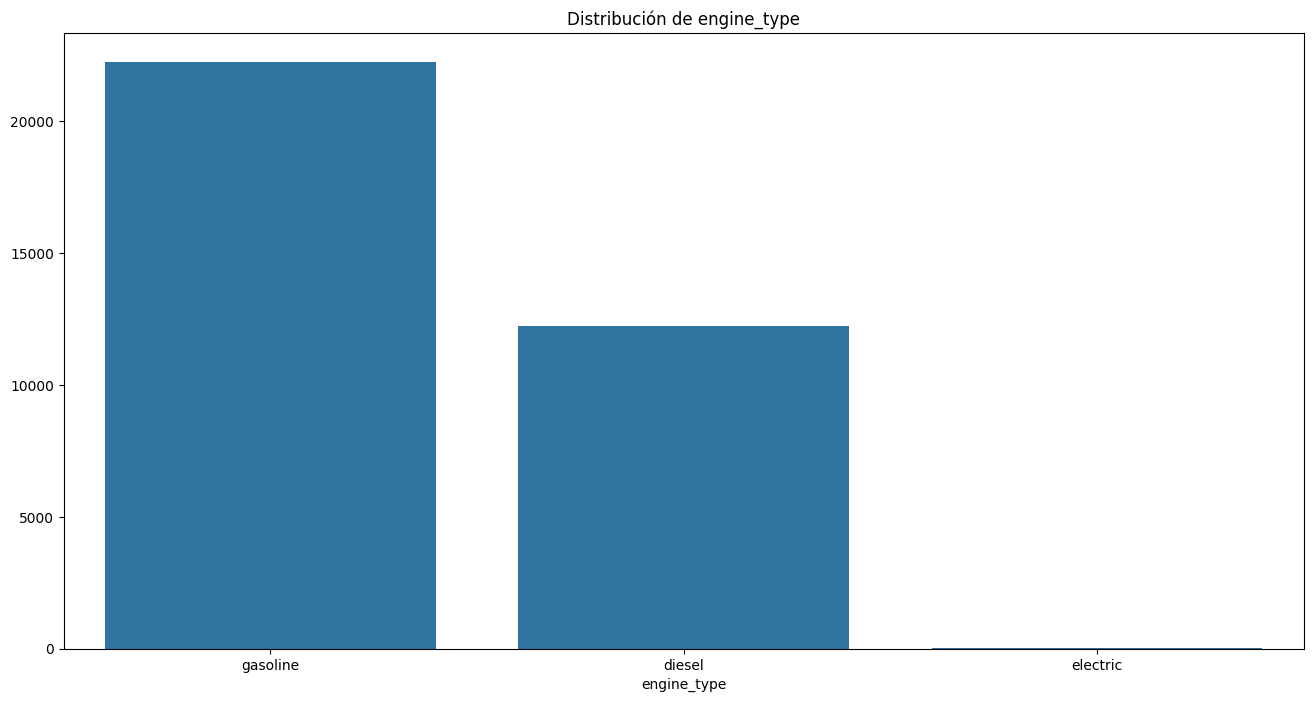

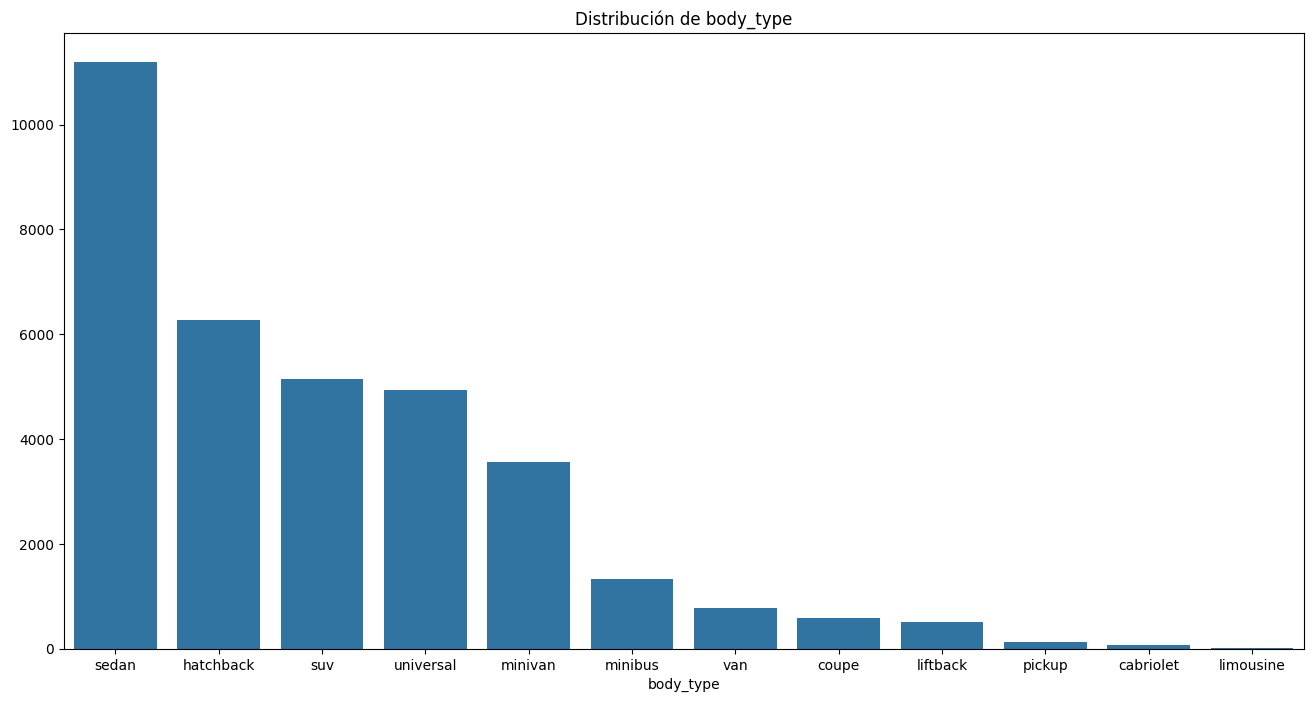

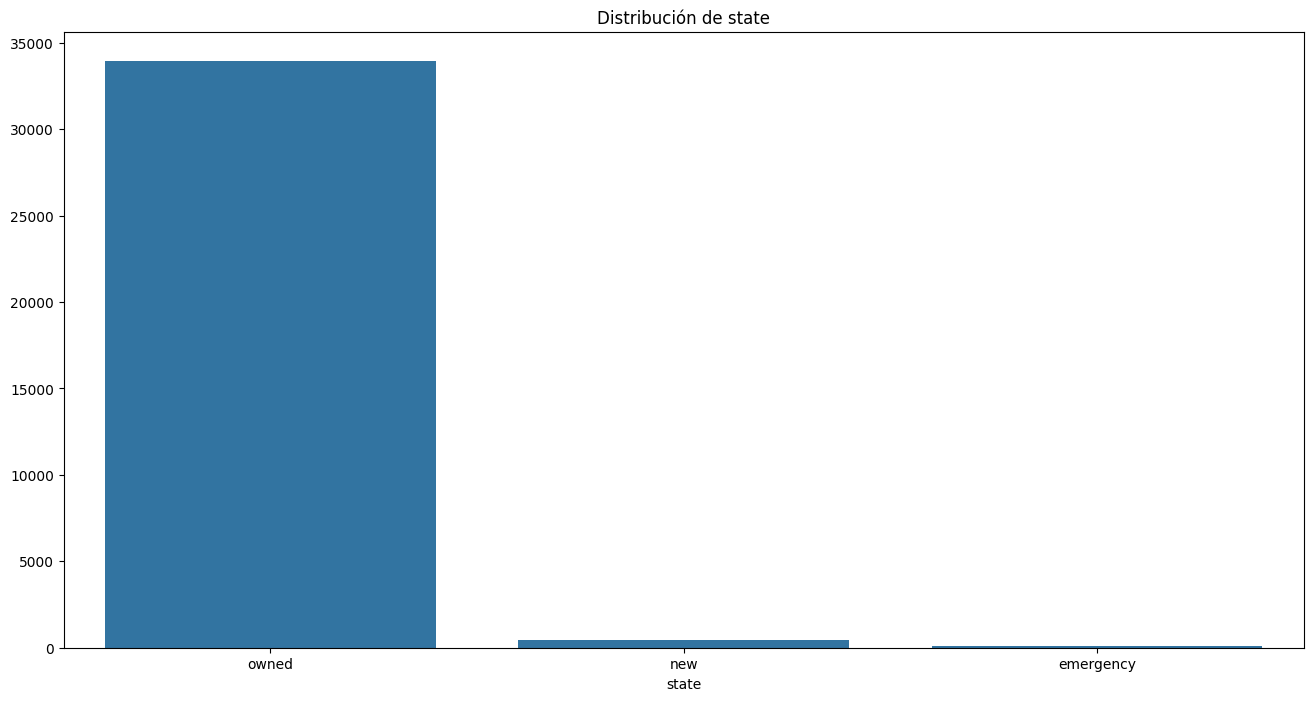

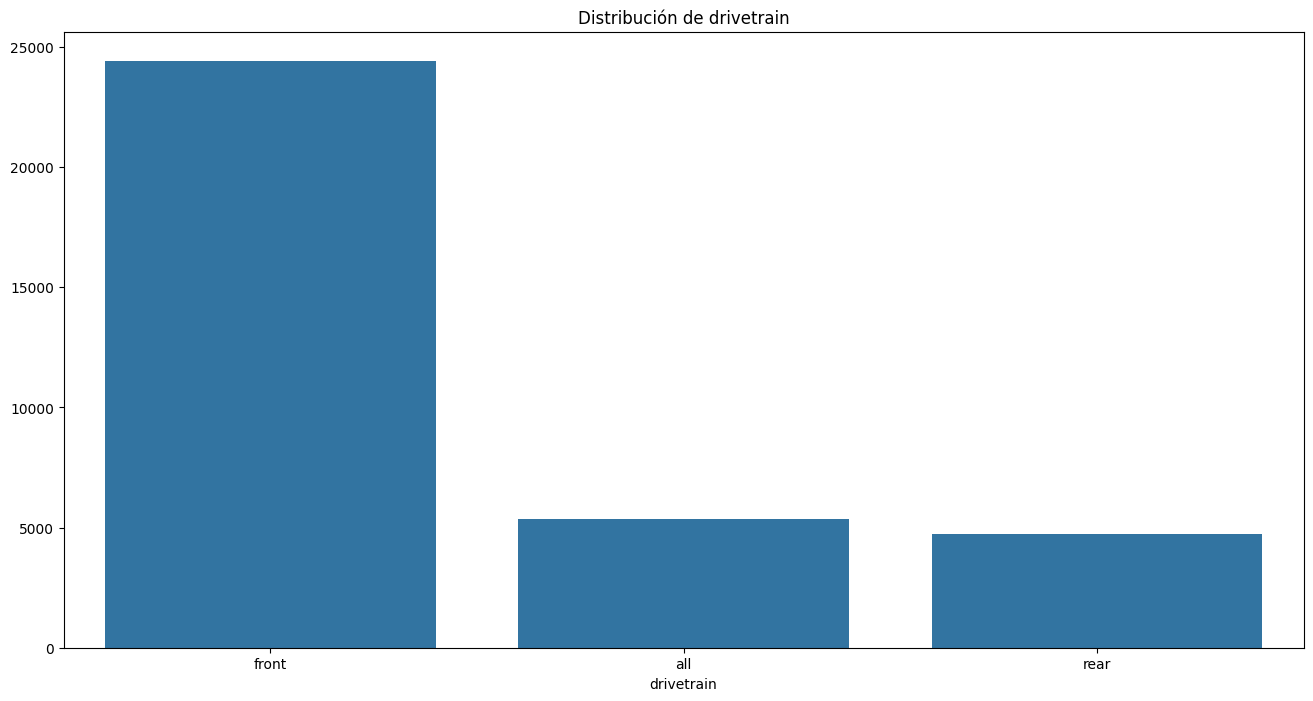

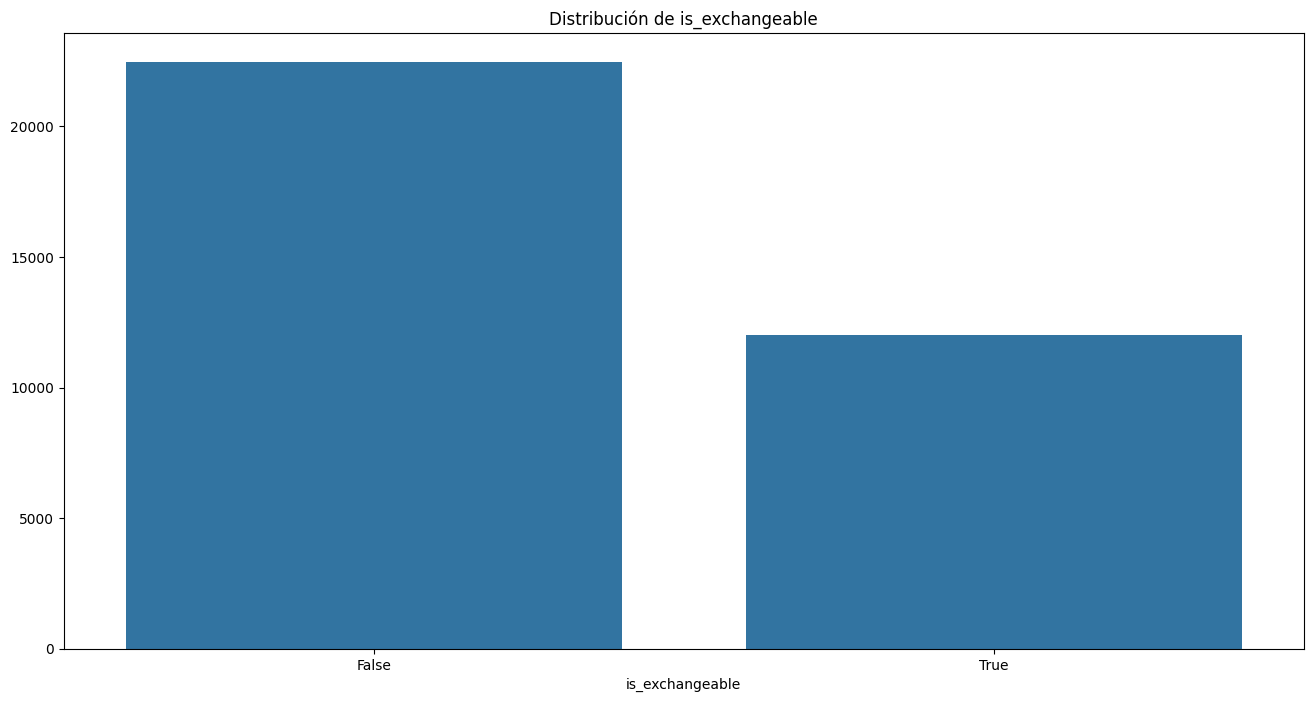

In [339]:
for col in variables_categoricas:
    plt.figure(figsize=(16,8))
    sns.barplot(x=df_clear[col].value_counts().index, y=df_clear[col].value_counts().values)
    plt.title(f'Distribución de {col}')
    plt.show()

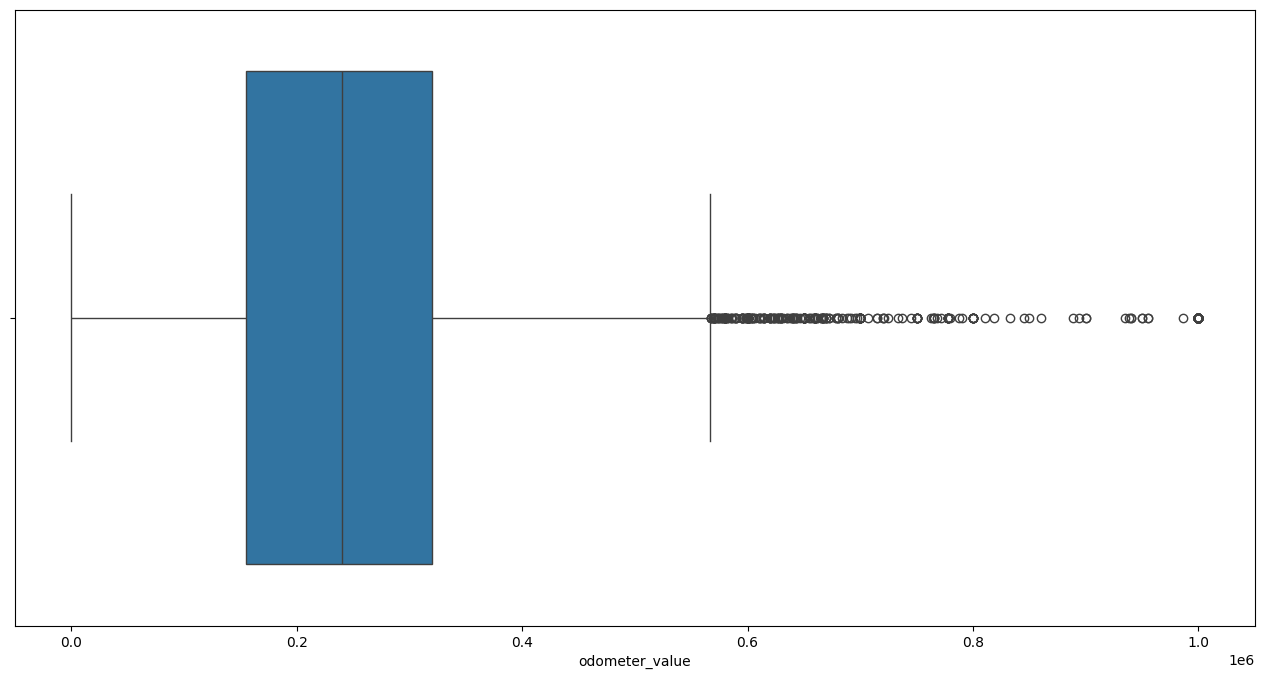

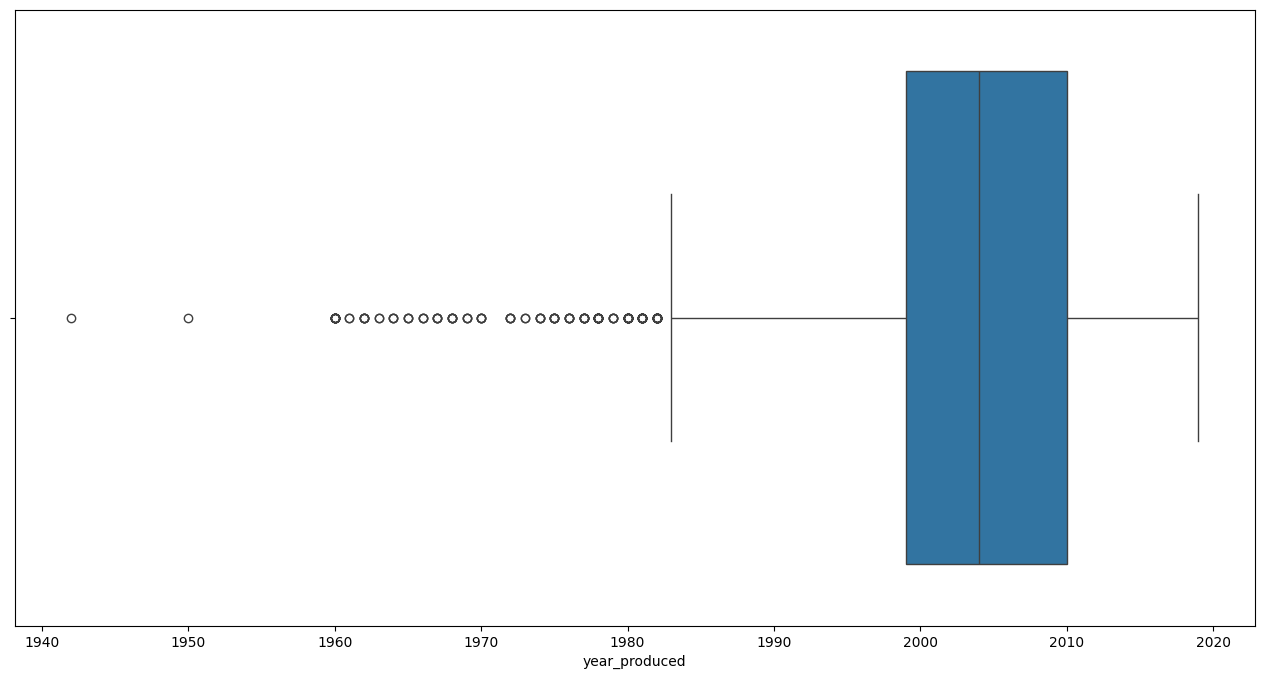

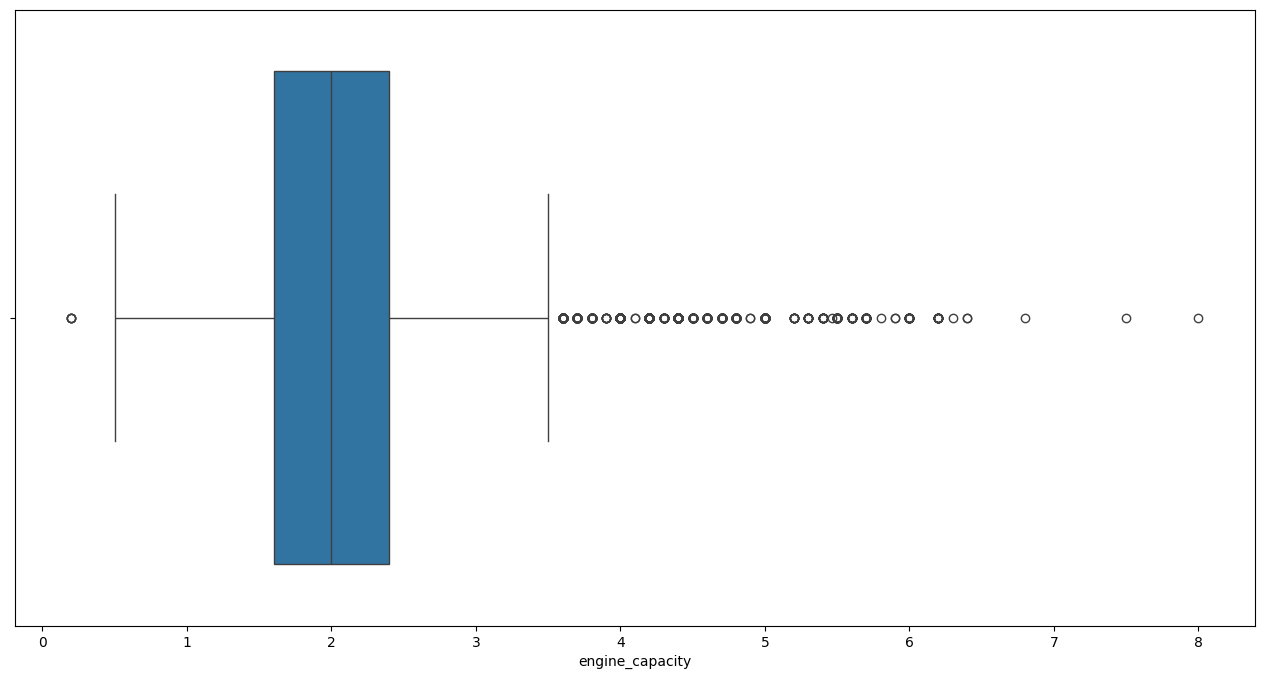

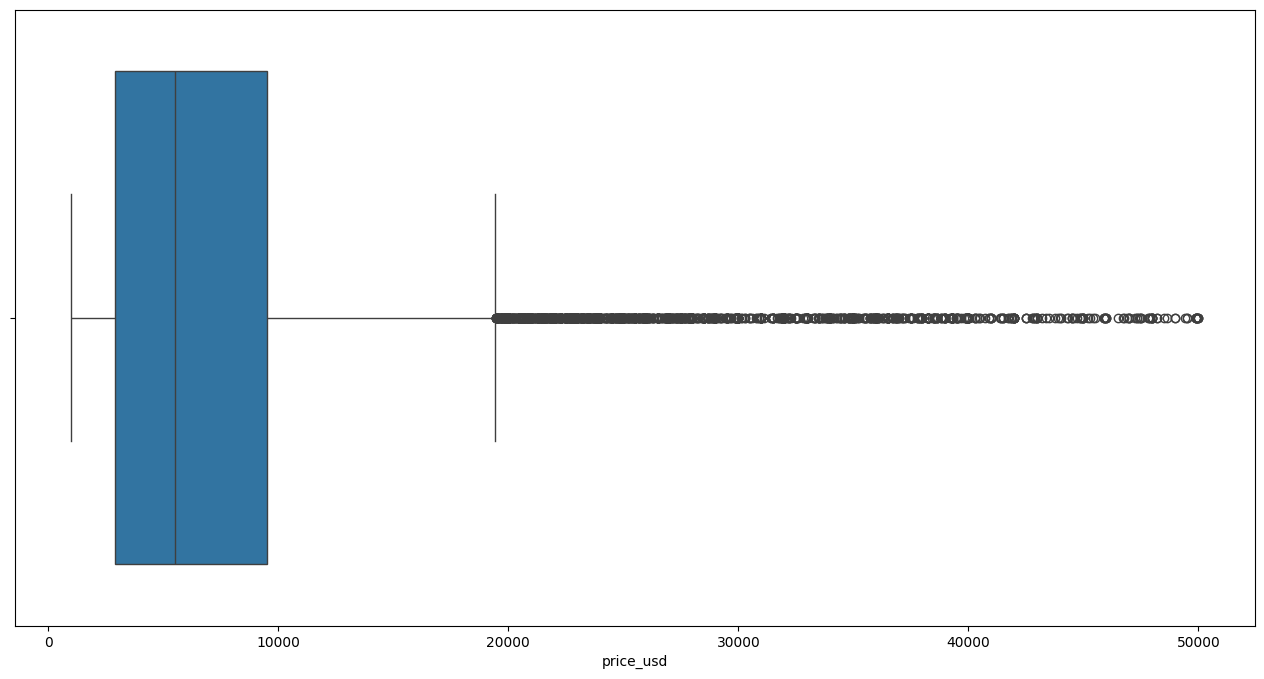

In [340]:
for col in variables_numericas:
    plt.figure(figsize=(16,8))
    sns.boxplot(x=col, data=df_clear)
    plt.show()

In [341]:
# Eliminando outliers basados en el IQR
Q1 = df_clear[variables_numericas].quantile(0.25)
Q3 = df_clear[variables_numericas].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_clear[~((df_clear[variables_numericas] < (Q1 - 1.5 * IQR)) |(df_clear[variables_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.info()
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers


<class 'pandas.core.frame.DataFrame'>
Index: 31194 entries, 0 to 38530
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  31194 non-null  object 
 1   transmission       31194 non-null  object 
 2   color              31194 non-null  object 
 3   odometer_value     31194 non-null  int64  
 4   year_produced      31194 non-null  int64  
 5   engine_fuel        31194 non-null  object 
 6   engine_has_gas     31194 non-null  bool   
 7   engine_type        31194 non-null  object 
 8   engine_capacity    31186 non-null  float64
 9   body_type          31194 non-null  object 
 10  has_warranty       31194 non-null  bool   
 11  state              31194 non-null  object 
 12  drivetrain         31194 non-null  object 
 13  price_usd          31194 non-null  float64
 14  is_exchangeable    31194 non-null  bool   
dtypes: bool(3), float64(2), int64(2), object(8)
memory usage: 3.2+ MB


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable
0,Subaru,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False
1,Subaru,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True
2,Subaru,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True
3,Subaru,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True
4,Subaru,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31189,Chrysler,mechanical,violet,317000,1999,gas,True,gasoline,2.0,minivan,False,owned,front,3300.00,True
31190,Chrysler,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True
31191,Chrysler,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True
31192,Chrysler,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True


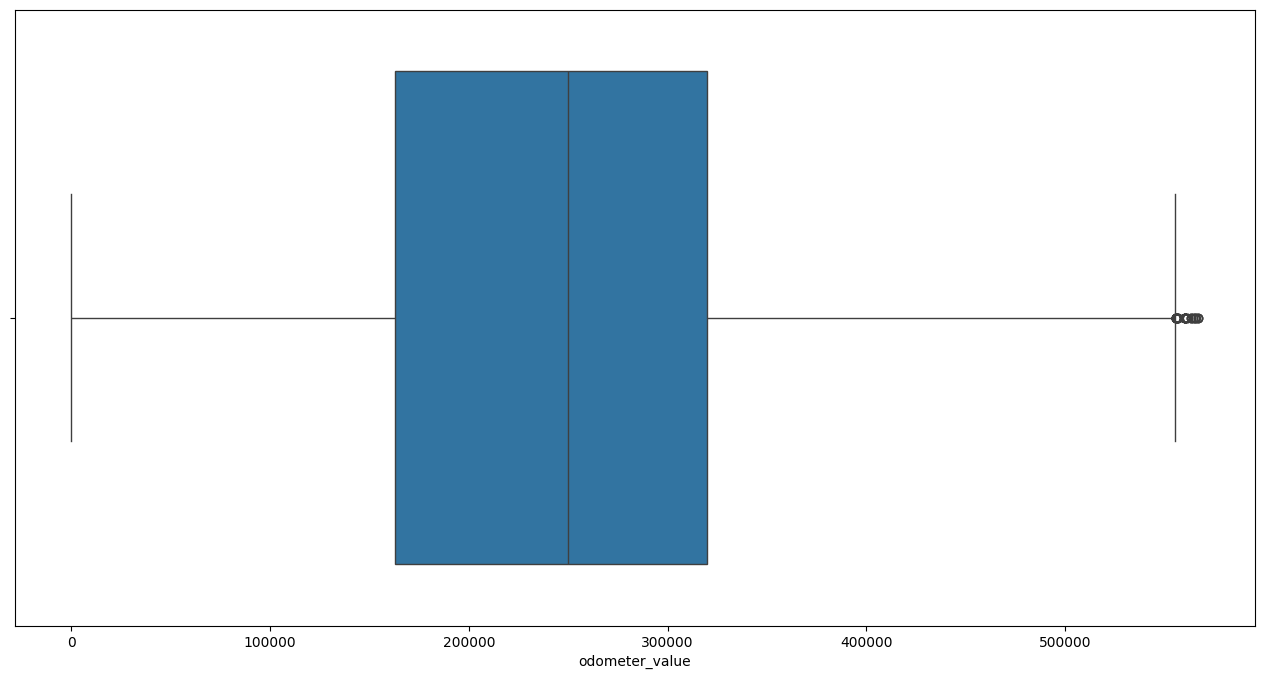

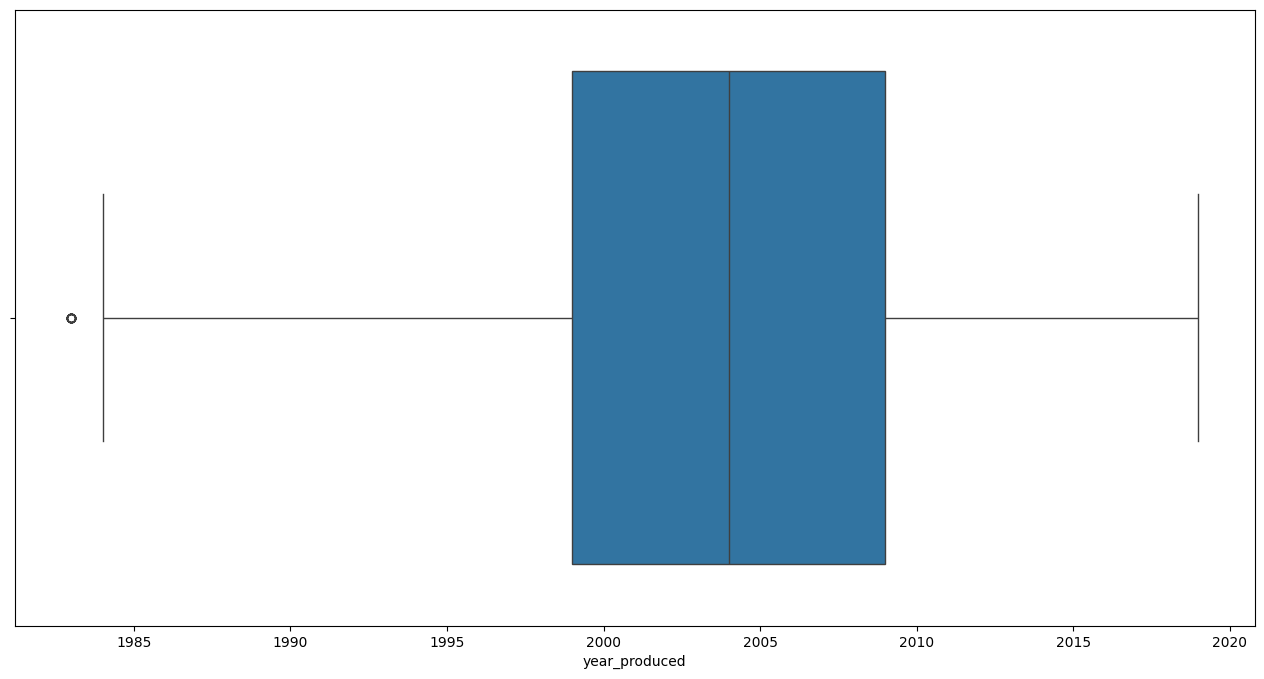

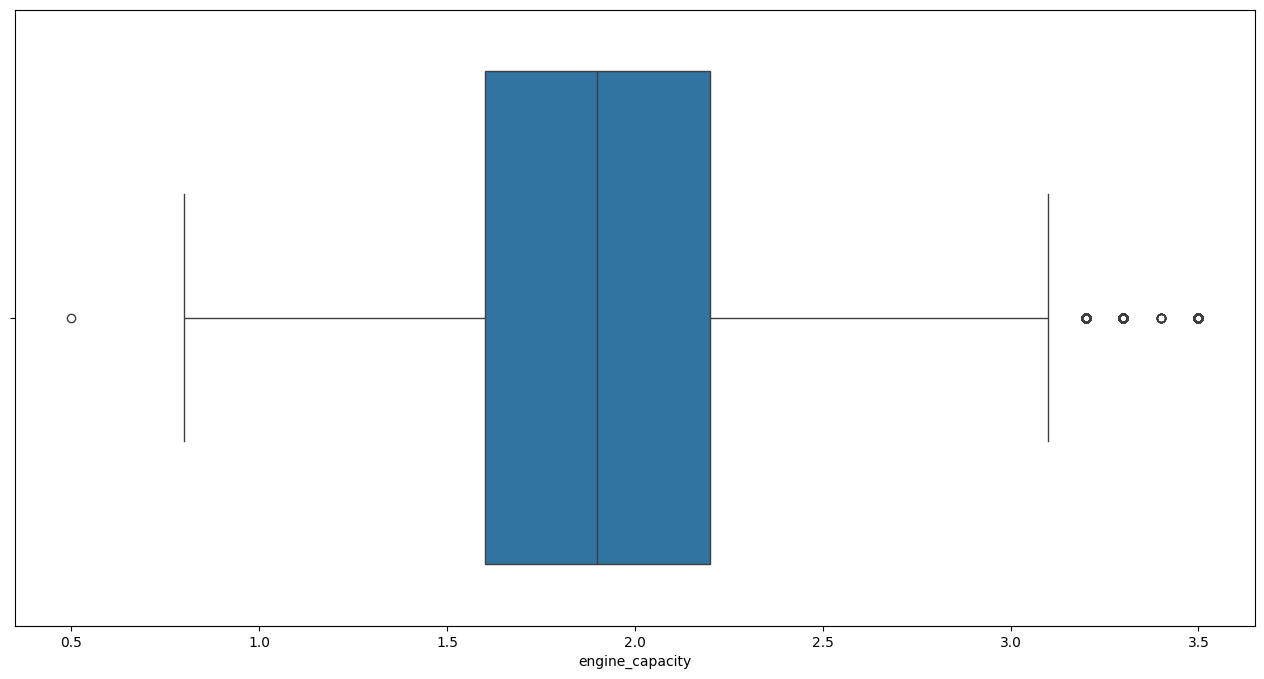

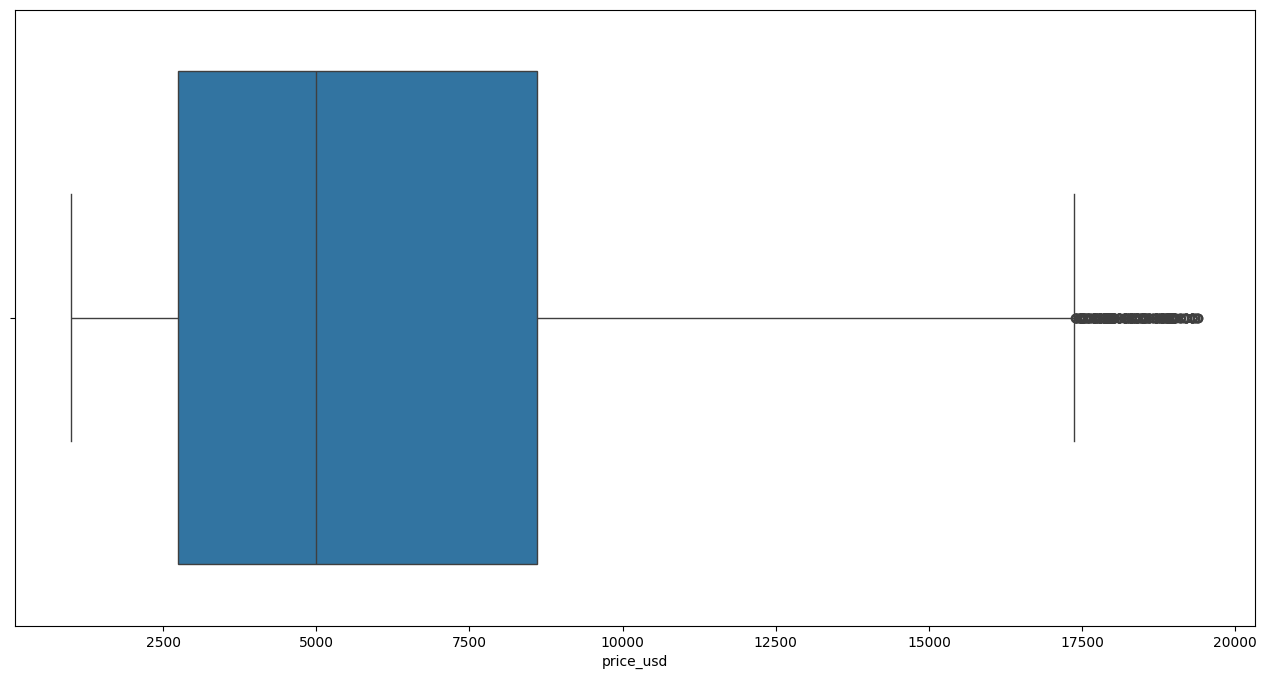

In [342]:
for col in variables_numericas: 
    plt.figure(figsize=(16,8))
    sns.boxplot(x=col, data=df_no_outliers)
    plt.show()

## Interpretación de la Matriz de Correlación

Esta matriz muestra las relaciones lineales entre las variables `odometer_value`, `year_produced`, `engine_capacity` y `price_usd` (variable objetivo). Los valores oscilan entre **-1** (correlación negativa perfecta) y **1** (correlación positiva perfecta).


### Relaciones con el precio (`price_usd`)

| Variable           | Correlación | Interpretación                                                                 |
|--------------------|-------------|------------------------------------------------------------------------------|
| `year_produced`    | 0.80        | Fuerte correlación positiva: Los autos más recientes (año alto) tienen precios significativamente más altos. |
| `odometer_value`   | -0.43       | Correlación negativa moderada: Mayor kilometraje se asocia con precios más bajos (autos "más gastados"). |
| `engine_capacity`  | 0.16        | Correlación débil positiva: Capacidad del motor tiene un impacto mínimo en el precio (poco relevante). |


### Relaciones entre variables predictoras

| Par de variables                          | Correlación | Interpretación                                                                 |
|-------------------------------------------|-------------|------------------------------------------------------------------------------|
| `year_produced` vs `odometer_value`       | -0.52       | Correlación negativa moderada: Autos más nuevos (año alto) suelen tener menos kilometraje. |
| `year_produced` vs `engine_capacity`      | -0.12       | Correlación casi nula: No hay relación clara entre el año de fabricación y la capacidad del motor. |
| `odometer_value` vs `engine_capacity`     | 0.28        | Correlación débil positiva: Autos con mayor kilometraje tienden a tener ligeramente motores más grandes (poco significativo). |


### Implicaciones para el modelo predictivo

### `year_produced` es el mejor predictor
Su alta correlación con `price_usd` (**0.80**) sugiere que es **clave para predecir el precio**.  
*Ejemplo práctico*: Un auto del 2020 probablemente valdrá más que uno del 2010 (con igual kilometraje).


###  Riesgo de multicolinealidad
La correlación moderada entre `year_produced` y `odometer_value` (**-0.52**) podría generar **interferencia en el modelo lineal** si se usan ambas variables simultáneamente.  
**Recomendación**: Si se incluyen ambas, verificar el **Factor de Inflación de la Varianza (VIF)** para detectar y mitigar problemas de multicolinealidad.


### Variables con bajo impacto
`engine_capacity` muestra correlación casi nula con `price_usd` (**0.16**), lo que indica que **no aporta información relevante** para predecir el precio.  
**Acción recomendada**: Eliminar esta variable para simplificar el modelo y mejorar su interpretabilidad (coherente con la estrategia inicial de descartar variables no significativas).

# 6.- Correlacion entre variables
---

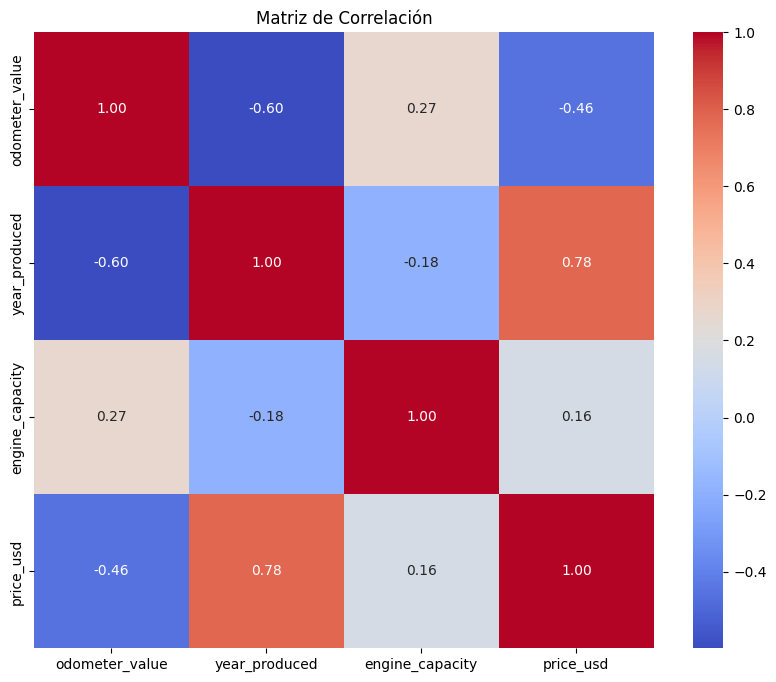

In [343]:
# Análisis de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers[variables_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()  


# 7.- Estandarizar variables categoricas
---

In [344]:
# convertiendo variables categóricas a numéricas
df_final = pd.get_dummies(df_no_outliers, columns=variables_categoricas, drop_first=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31194 entries, 0 to 31193
Data columns (total 95 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   odometer_value                   31194 non-null  int64  
 1   year_produced                    31194 non-null  int64  
 2   engine_has_gas                   31194 non-null  bool   
 3   engine_capacity                  31186 non-null  float64
 4   has_warranty                     31194 non-null  bool   
 5   price_usd                        31194 non-null  float64
 6   manufacturer_name_Alfa Romeo     31194 non-null  bool   
 7   manufacturer_name_Audi           31194 non-null  bool   
 8   manufacturer_name_BMW            31194 non-null  bool   
 9   manufacturer_name_Buick          31194 non-null  bool   
 10  manufacturer_name_Cadillac       31194 non-null  bool   
 11  manufacturer_name_Chery          31194 non-null  bool   
 12  manufacturer_name_

In [345]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Columnas numéricas
cols_to_scale = ["odometer_value", "year_produced", "engine_capacity"]

imputer = SimpleImputer(strategy="mean")
X_train[cols_to_scale] = imputer.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = imputer.transform(X_test[cols_to_scale])


scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [346]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [347]:
y_pred = model.predict(X_test)

## Interpretación de la Matriz de Correlación

Esta matriz muestra las relaciones lineales entre las variables `odometer_value`, `year_produced`, `engine_capacity` y `price_usd` (variable objetivo). Los valores oscilan entre **-1** (correlación negativa perfecta) y **1** (correlación positiva perfecta).


### Relaciones con el precio (`price_usd`)

| Variable           | Correlación | Interpretación                                                                 |
|--------------------|-------------|------------------------------------------------------------------------------|
| `year_produced`    | 0.80        | Fuerte correlación positiva: Los autos más recientes (año alto) tienen precios significativamente más altos. |
| `odometer_value`   | -0.43       | Correlación negativa moderada: Mayor kilometraje se asocia con precios más bajos (autos "más gastados"). |
| `engine_capacity`  | 0.16        | Correlación débil positiva: Capacidad del motor tiene un impacto mínimo en el precio (poco relevante). |


### Relaciones entre variables predictoras

| Par de variables                          | Correlación | Interpretación                                                                 |
|-------------------------------------------|-------------|------------------------------------------------------------------------------|
| `year_produced` vs `odometer_value`       | -0.52       | Correlación negativa moderada: Autos más nuevos (año alto) suelen tener menos kilometraje. |
| `year_produced` vs `engine_capacity`      | -0.12       | Correlación casi nula: No hay relación clara entre el año de fabricación y la capacidad del motor. |
| `odometer_value` vs `engine_capacity`     | 0.28        | Correlación débil positiva: Autos con mayor kilometraje tienden a tener ligeramente motores más grandes (poco significativo). |


### Implicaciones para el modelo predictivo

### `year_produced` es el mejor predictor
Su alta correlación con `price_usd` (**0.80**) sugiere que es **clave para predecir el precio**.  
*Ejemplo práctico*: Un auto del 2020 probablemente valdrá más que uno del 2010 (con igual kilometraje).


###  Riesgo de multicolinealidad
La correlación moderada entre `year_produced` y `odometer_value` (**-0.52**) podría generar **interferencia en el modelo lineal** si se usan ambas variables simultáneamente.  
**Recomendación**: Si se incluyen ambas, verificar el **Factor de Inflación de la Varianza (VIF)** para detectar y mitigar problemas de multicolinealidad.


### Variables con bajo impacto
`engine_capacity` muestra correlación casi nula con `price_usd` (**0.16**), lo que indica que **no aporta información relevante** para predecir el precio.  
**Acción recomendada**: Eliminar esta variable para simplificar el modelo y mejorar su interpretabilidad (coherente con la estrategia inicial de descartar variables no significativas).

# 7.- Estandarizar variables categoricas
---

In [348]:
# convertiendo variables categóricas a numéricas
df_final = pd.get_dummies(df_no_outliers, columns=variables_categoricas, drop_first=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31194 entries, 0 to 31193
Data columns (total 95 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   odometer_value                   31194 non-null  int64  
 1   year_produced                    31194 non-null  int64  
 2   engine_has_gas                   31194 non-null  bool   
 3   engine_capacity                  31186 non-null  float64
 4   has_warranty                     31194 non-null  bool   
 5   price_usd                        31194 non-null  float64
 6   manufacturer_name_Alfa Romeo     31194 non-null  bool   
 7   manufacturer_name_Audi           31194 non-null  bool   
 8   manufacturer_name_BMW            31194 non-null  bool   
 9   manufacturer_name_Buick          31194 non-null  bool   
 10  manufacturer_name_Cadillac       31194 non-null  bool   
 11  manufacturer_name_Chery          31194 non-null  bool   
 12  manufacturer_name_

In [349]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [350]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Columnas numéricas
cols_to_scale = ["odometer_value", "year_produced", "engine_capacity"]

imputer = SimpleImputer(strategy="mean")
X_train[cols_to_scale] = imputer.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = imputer.transform(X_test[cols_to_scale])


scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# 7.- Estandarizar variables categoricas
---

## Interpretación de la Matriz de Correlación

Esta matriz muestra las relaciones lineales entre las variables `odometer_value`, `year_produced`, `engine_capacity` y `price_usd` (variable objetivo). Los valores oscilan entre **-1** (correlación negativa perfecta) y **1** (correlación positiva perfecta).


### Relaciones con el precio (`price_usd`)

| Variable           | Correlación | Interpretación                                                                 |
|--------------------|-------------|------------------------------------------------------------------------------|
| `year_produced`    | 0.80        | Fuerte correlación positiva: Los autos más recientes (año alto) tienen precios significativamente más altos. |
| `odometer_value`   | -0.43       | Correlación negativa moderada: Mayor kilometraje se asocia con precios más bajos (autos "más gastados"). |
| `engine_capacity`  | 0.16        | Correlación débil positiva: Capacidad del motor tiene un impacto mínimo en el precio (poco relevante). |


### Relaciones entre variables predictoras

| Par de variables                          | Correlación | Interpretación                                                                 |
|-------------------------------------------|-------------|------------------------------------------------------------------------------|
| `year_produced` vs `odometer_value`       | -0.52       | Correlación negativa moderada: Autos más nuevos (año alto) suelen tener menos kilometraje. |
| `year_produced` vs `engine_capacity`      | -0.12       | Correlación casi nula: No hay relación clara entre el año de fabricación y la capacidad del motor. |
| `odometer_value` vs `engine_capacity`     | 0.28        | Correlación débil positiva: Autos con mayor kilometraje tienden a tener ligeramente motores más grandes (poco significativo). |


### Implicaciones para el modelo predictivo

### `year_produced` es el mejor predictor
Su alta correlación con `price_usd` (**0.80**) sugiere que es **clave para predecir el precio**.  
*Ejemplo práctico*: Un auto del 2020 probablemente valdrá más que uno del 2010 (con igual kilometraje).


###  Riesgo de multicolinealidad
La correlación moderada entre `year_produced` y `odometer_value` (**-0.52**) podría generar **interferencia en el modelo lineal** si se usan ambas variables simultáneamente.  
**Recomendación**: Si se incluyen ambas, verificar el **Factor de Inflación de la Varianza (VIF)** para detectar y mitigar problemas de multicolinealidad.


### Variables con bajo impacto
`engine_capacity` muestra correlación casi nula con `price_usd` (**0.16**), lo que indica que **no aporta información relevante** para predecir el precio.  
**Acción recomendada**: Eliminar esta variable para simplificar el modelo y mejorar su interpretabilidad (coherente con la estrategia inicial de descartar variables no significativas).

# 8.- Estandarización
---
converimos las variables variables_categoricas a numéricas por el metodo de get dummies y eliminamos la primera columna para evitar la multicolinealidad. teniendo ahora 94 columnas en total.

In [351]:
# convertiendo variables categóricas a numéricas
df_final = pd.get_dummies(df_no_outliers, columns=variables_categoricas, drop_first=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31194 entries, 0 to 31193
Data columns (total 95 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   odometer_value                   31194 non-null  int64  
 1   year_produced                    31194 non-null  int64  
 2   engine_has_gas                   31194 non-null  bool   
 3   engine_capacity                  31186 non-null  float64
 4   has_warranty                     31194 non-null  bool   
 5   price_usd                        31194 non-null  float64
 6   manufacturer_name_Alfa Romeo     31194 non-null  bool   
 7   manufacturer_name_Audi           31194 non-null  bool   
 8   manufacturer_name_BMW            31194 non-null  bool   
 9   manufacturer_name_Buick          31194 non-null  bool   
 10  manufacturer_name_Cadillac       31194 non-null  bool   
 11  manufacturer_name_Chery          31194 non-null  bool   
 12  manufacturer_name_

In [352]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Columnas numéricas
cols_to_scale = ["odometer_value", "year_produced", "engine_capacity"]

imputer = SimpleImputer(strategy="mean")
X_train[cols_to_scale] = imputer.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = imputer.transform(X_test[cols_to_scale])


scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# 9.- Modelo lineal multiple
---

In [353]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [354]:
y_pred = model.predict(X_test)

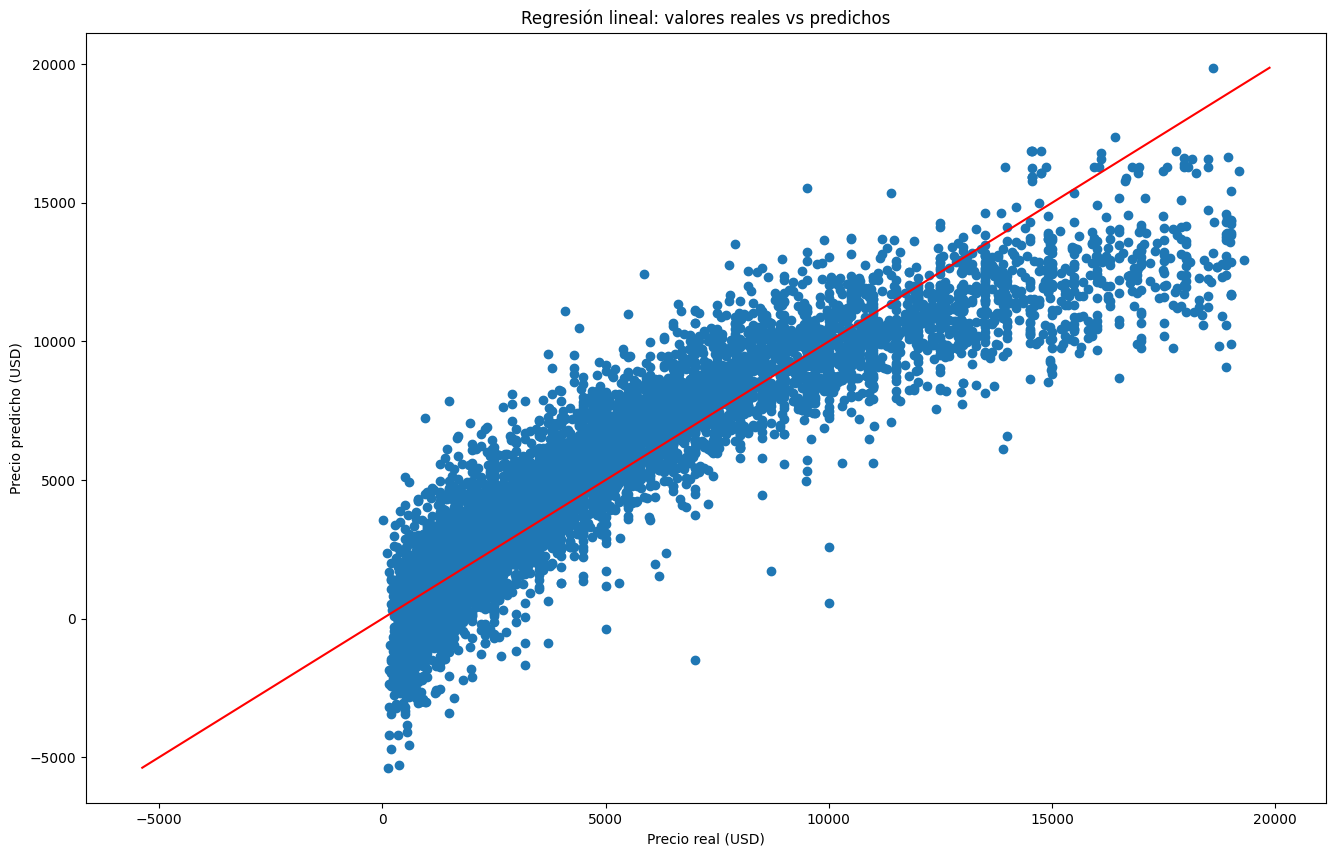

In [355]:
plt.figure(figsize=(16, 10))
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-')

plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title("Regresión lineal: valores reales vs predichos")
plt.show()

La gráfica de valores reales vs predichos muestra una relación lineal positiva clara, lo que indica que el modelo captura adecuadamente la tendencia general del precio. Sin embargo, se observa una mayor dispersión en valores altos y una ligera subestimación en autos de mayor precio, lo que sugiere que un modelo lineal puede ser limitado para capturar completamente la variabilidad del mercado.

In [356]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f} USD")

R²: 0.822
RMSE: 1823.57 USD


# 10.- Conclusiones 
---
En este trabajo se desarrolló un modelo de regresión lineal multivariable para predecir el precio de vehículos a partir de características numéricas y categóricas previamente codificadas mediante variables dummy.

Previo al entrenamiento del modelo, se realizó un análisis exploratorio que permitió identificar valores atípicos de precios cercanos a cero, los cuales fueron eliminados por no representar precios reales del mercado automotriz. Asimismo, se trataron valores faltantes mediante imputación por la media y se estandarizaron las variables numéricas para evitar problemas de escala.

El modelo obtenido alcanzó un coeficiente de determinación R² de 0.822, lo que indica que explica aproximadamente el 82.2% de la variabilidad del precio de los vehículos. Adicionalmente, se obtuvo un error cuadrático medio (RMSE) de 1823.57 USD, lo que representa un error promedio razonable considerando el rango de precios del conjunto de datos.

A partir del análisis gráfico de valores reales versus predichos, se observó que el modelo captura adecuadamente la tendencia general del mercado, aunque presenta una mayor dispersión en vehículos de alto valor, lo cual es consistente con las limitaciones de los modelos lineales.
Entre las mejoras que se podrían implementar en futuros trabajos se encuentran la exploración de modelos no lineales, como random forests o otros modelos de machine learning más complejos que puedan capturar mejor las relaciones no lineales entre las características y el precio. Además, se podría considerar la inclusión de interacciones entre variables para mejorar el rendimiento predictivo del modelo.